# Contexto

Neste notebook está uma **análise exploratória** dos dados do Datathon do WiDS 2021. Nele, aplicamos algumas lições aprendidas no livro "**<a href="https://www.storytellingwithdata.com/books">Storytelling com dados</a>**" da Cole Knaflic (*caso ainda não tenha lido, eu super recomendo!!!*). Antes de iniciarmos os trabalhos, introduziremos rapidamente o WiDS (*caso você não conheça*) e falaremos sobre o desafio do Datathon 2021. Vamos nessa?!?

## O que  é WiDS?

<a href="https://www.widsconference.org/">WiDS (Women in Data Science)</a>, iniciativa surgida em Stanford em 2015, visa inspirar e educar Cientistas de Dados em todo o mundo, independente do gênero, e dar suporte a mulheres da área. 


## Datathon WiDS

Em 2021, o WiDS anunciou seu quarto <a href="https://www.kaggle.com/c/widsdatathon2021">Datathon</a> que foi focado na área da saúde. O objetivo era construir modelos para determinar se um paciente que foi admitido na UTI seria diagnosticado com Diabetes Mellitus.


#### Diabetes Mellitus


É uma doença metabólica que resulta em níveis elevados de glicose no sangue. Isso pode ocorrer quando nosso corpo não produz adequadamente ou não emprega adequadamente a insulina, hormônio produzido pelas células beta do pâncreas, que é responsável por regular a quantidade de glicose no sangue [<a href="https://www.diabetes.org.br/publico/diabetes/oque-e-diabetes"> REF </a>]. Exisem dois tipos de diabetes:

- Diabetes Tipo 1: ocorre quando o sistema imunológico ataca as células beta. Consequentemente elas passam a produzir pouca ou nenhuma insulina. Assim, a glicose fica no sangue ao invés de ser utilizada como energia.
- Diabetes Tipo 2: ocorre quando o corpo não consegue utilizar adequadamente a insulina produzida pelo corpo, ou não produz o suficiente para controlar a taxa de glicemia (quantidade de glicose no sangue). Este é o tipo mais comum de diabetes.


Segundo a Sociedade Brasileira de Diabetes (SDB), alguns fatores que podem acarretar no surgimento de tal doença são: pressão alta, estar acima do peso, etc. Também de acordo com a SDB, algumas das complicações de saúde que podem estar associadas ao diabetes são: doenças renais, retinopatia e outras.

# Análise Exploratória dos Dados

Pronto, agora vamos começar a esmiuçar os dados (*hehehe*)!!

O Datathon forneceu uma base de treinamento e outra de teste. Aqui, nós iremos nos concentrar na de treinamento.


In [1]:
# Importando as Bibliotecas

import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import utils as ul

In [2]:
# Definindo algumas configurações de apresentação

%matplotlib inline
sns.set(style="white")
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [3]:
# Lendo os dados

df = pd.read_csv('TrainingWiDS2021.csv', sep=",") # Dados de treinamento
data_dict = pd.read_csv('DataDictionaryWiDS2021.csv', sep=",") # Dicionário com informações das variáveis

A base contém dados sobre pacientes nas primeiras 24h sob cuidado intensivo (na UTI), onde cada instância diz respeito a um paciente.

Algumas das informações fornecidas são: idade, gênero, peso e altura. Outras variáveis dizem respeito à procedência do paciente (ex: hospital_admit_source). E outras são histórico de monitoramento de taxas das primeiras 24h do paciente na UTI (ex: glucose_apache).

A variável target é "diabetes_mellitus" que informa se o paciente foi diagnosticado ou não com diabetes mellitus. 

Na tabela abaixo, é possível ver os nomes das variáveis e suas respectivas descrições.

In [4]:
pd.set_option('display.max_rows', 500) 
pd.set_option('max_colwidth', 500) 
data_dict[['Variable Name', 'Description']]

,Variable Name,Description
0,encounter_id,Unique identifier associated with a patient unit stay
1,hospital_id,Unique identifier associated with a hospital
2,age,The age of the patient on unit admission
3,bmi,The body mass index of the person on unit admission
4,elective_surgery,Whether the patient was admitted to the hospital for an elective surgical operation
5,ethnicity,The common national or cultural tradition which the person belongs to
6,gender,The genotypical sex of the patient
7,height,The height of the person on unit admission
8,hospital_admit_source,The location of the patient prior to being admitted to the hospital
9,icu_admit_source,The location of the patient prior to being admitted to the unit


A base de é composta por **130.157 instâncias e 180 features**, incluindo a target (diabetes_mellitus). Ver na tabela abaixo!

In [5]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Data columns (total 181 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   130157 non-null  int64  
 1   encounter_id                 130157 non-null  int64  
 2   hospital_id                  130157 non-null  int64  
 3   age                          125169 non-null  float64
 4   bmi                          125667 non-null  float64
 5   elective_surgery             130157 non-null  int64  
 6   ethnicity                    128570 non-null  object 
 7   gender                       130091 non-null  object 
 8   height                       128080 non-null  float64
 9   hospital_admit_source        96959 non-null   object 
 10  icu_admit_source             129917 non-null  object 
 11  icu_id                       130157 non-null  int64  
 12  icu_stay_type                130157 non-null  object 
 13

157 das variáveis são do tipo float, 18 são object e 6 são int (incluindo diabetes_mellitus).

In [6]:
df.dtypes.value_counts()

float64    157
int64       18
object       6
dtype: int64

Agora, vendo um pouco das variáveis... A tabela abaixo mostra as primeiras 5 linhas (instâncias da base).

Já podemos observar, por exemplo, que existem alguns valores "NaN". 

In [7]:
df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,1

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,130157.0,65079.000000,37573.233831,1.000000,32540.000000,65079.000000,97618.000000,130157.000000
encounter_id,130157.0,213000.856519,38109.828146,147000.000000,180001.000000,213014.000000,246002.000000,279000.000000
hospital_id,130157.0,106.102131,63.482277,1.000000,49.000000,112.000000,165.000000,204.000000
age,125169.0,61.995103,16.822880,0.000000,52.000000,64.000000,75.000000,89.000000
bmi,125667.0,29.110260,8.262776,14.844926,23.598006,27.564749,32.803127,67.814990
elective_surgery,130157.0,0.189840,0.392176,0.000000,0.000000,0.000000,0.000000,1.000000
height,128080.0,169.607219,10.833085,137.200000,162.500000,170.100000,177.800000,195.590000
icu_id,130157.0,662.428344,304.259843,82.000000,427.000000,653.000000,969.000000,1111.000000
pre_icu_los_days,130157.0,0.839933,2.485337,-0.250000,0.045833,0.155556,0.423611,175.627778
readmission_status,130157.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Correlação entre as variáveis

Aqui, calculamos a correlação entre todas as variáveis e também fizemos somente a correlação entre a variável target (diabetes_mellitus) e outras variáveis.

### Correlação entre todas as variáveis

O mapa de calor abaixo mostra a correlação entre todas as variáveis, quanto mais escuro, maior a correlação. Visivelmente observamos que existe uma correlação baixa entre a maioria das variáveis.

[[]]

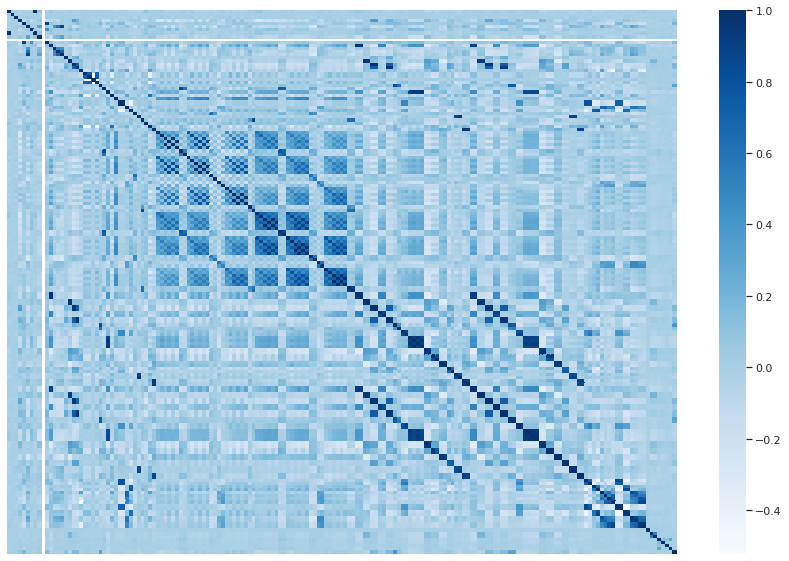

In [9]:
columns = df.columns.values
corr = df[columns].corr(method='spearman')

plt.figure(figsize = (15,10))
g = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='Blues')

g.set(yticklabels=[])
g.set(xticklabels=[])

### Correlação entre a vaiável target e as outras

Já o mapa de calor abaixo exibe a correlação entre diabetes_mellitus e as outras variáveis com valor (de correlação) maior que 0.023497 (valor do terceiro quartil).

Observamos que as variáveis de maior correlação com diabetes_mellitus são as relacionadas à glicose (d1_glucose_max, glucose_apache), ao índice de massa corpórea e peso.

In [10]:
corr_diabetes = corr['diabetes_mellitus']
df_corr_diabetes = pd.DataFrame(data={'Feature' : corr_diabetes.index,
                                      'Correlation': corr_diabetes.values})
df_corr_diabetes = df_corr_diabetes.sort_values(by='Correlation', ascending=False)
df_corr_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Correlation,174.0,0.016862,0.107257,-0.109466,-0.026431,-0.003337,0.024229,1.0


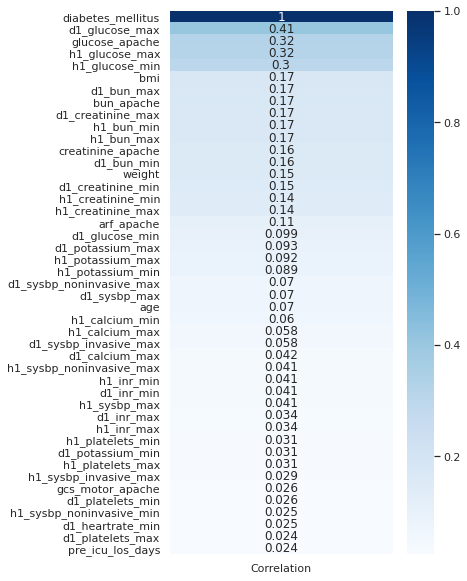

In [11]:
df_corr_diabetes = df_corr_diabetes.loc[df_corr_diabetes['Correlation'] > 0.023497]
labels = df_corr_diabetes['Feature']
df_corr_diabetes = df_corr_diabetes.drop(['Feature'], axis=1)
plt.figure(figsize = (5,10))
g = sns.heatmap(df_corr_diabetes, annot=True, cmap='Blues', yticklabels=labels.to_numpy())

Como são muitas variáveis (180), selecionamos um grupo para fazermos uma análise mais aprofundada. Primeiro, além da distribuição da variável target (diabetes_mellitus), vamos observar melhor algumas das mais gerais, como gênero, etinia, etc. Em seguida, exploraremos as que estão mais correlacionadas com diabetes_mellitus de acordo com a imagem acima (glucose_apache, bmi). Também analisaremos outras relacionadas a algumas complicações que podem estar associadas ao diabetes de acordo com a medicina. Vamos explicando ao longo da análise.

## Variáveis mais gerais

### Diabéticos e não diabéticos

O gráfico abaixo mostra que 22% dos pacientes são diabéticas.

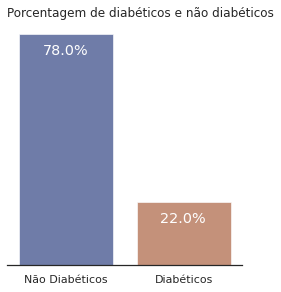

In [12]:
ul.bar_plot(df, 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, fontsize='large', palette='dark', 
            title='Porcentagem de diabéticos e não diabéticos', alpha=0.6)

### Gênero

Há 8% a mais de pessoas do gênero masculino do que do gênero feminino, 54% de homens e 46% de mulheres.


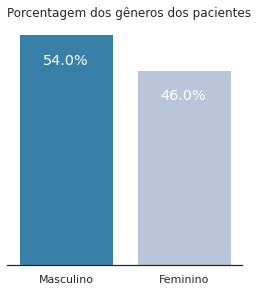

In [13]:
ul.bar_plot(df, 'gender', ['Masculino', 'Feminino'], order=['M', 'F'], height=4, fontsize='large', 
            title='Porcentagem dos gêneros dos pacientes')

Agora, vamos considerar somente o grupo de diabéticos e observar qual a procentagem de cada gênero neste subgrupo de pessoas. 

O gráfico abaixo mostra tal distribuição. Há 10% a mais de pessoas do gênero masculino com diabetes. Considerando que é semelhante à distribuição de gênero em toda base (gráfico acima), não dá pra tirar uma conclusão robusta se pessoas de determinado gênero são mais propensas a ter diabetes.

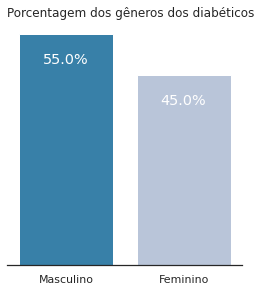

In [14]:
ul.bar_plot(df.loc[df['diabetes_mellitus'] == 1], 'gender', ['Masculino', 'Feminino'], order=['M', 'F'], height=4, 
            fontsize='large', title='Porcentagem dos gêneros dos diabéticos')

### Etnia


Como será a distribuição étnica na base? Será que pessoas de determinada etnia, por conta dos costumes, são mais propensas a adquirir a doença?

Vamos primeiro observar a distribuição étnica de todos os pacientes e depois observamos em cada grupo, diabéticos e não diabéticos. A maior parte dos pacientes (78%) são da etnia "Caucasian", seguindo de "African American" (11%) e "Other/Unknown" (5%). Já a menor parte deles (1%) são da "Native American". 

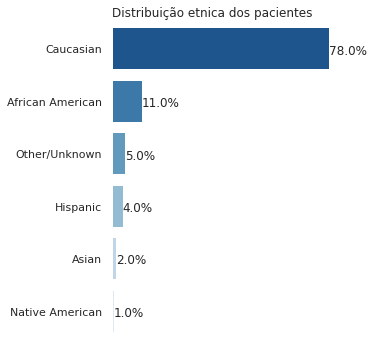

In [15]:
ul.horizontal_bar_plot(df, 'ethnicity', "Distribuição etnica dos pacientes")

Considerando somente os diabéticos, a porcentagem de pacientes da etnia "Caucasian" é de 74%, já a de "African American" é de 13%, enquanto a de "Other/Unknown" é de 6%.

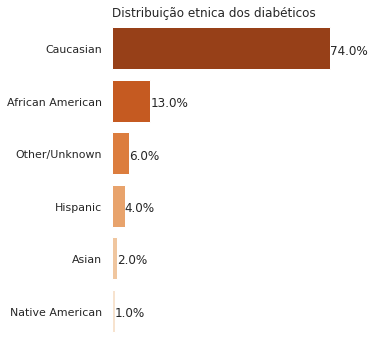

In [16]:
ul.horizontal_bar_plot(df.loc[df['diabetes_mellitus'] == 1], 'ethnicity', "Distribuição etnica dos diabéticos",
                       palette='Oranges_r')

### Idade

Abaixo, podemos ver a distribuição de idade dos diabéticos e não diabéticos. A maior parte dos pacientes têm entre 60 e 80 anos. 

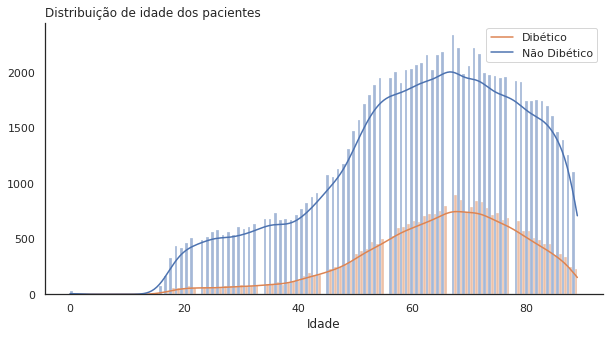

In [17]:
ul.hist_plot(df, 'age', 'Idade', title='Distribuição de idade dos pacientes', hue='diabetes_mellitus')

### Dias antes de ir pra UTI

Aqui, quisemos observar a quantidade de dias da admissão dos pacientes no hospital antes de irem pra UTI. Tanto os diabéticos, quanto os não diabéticos passaram menos de um dia antes de serem admitidos na UTI. 

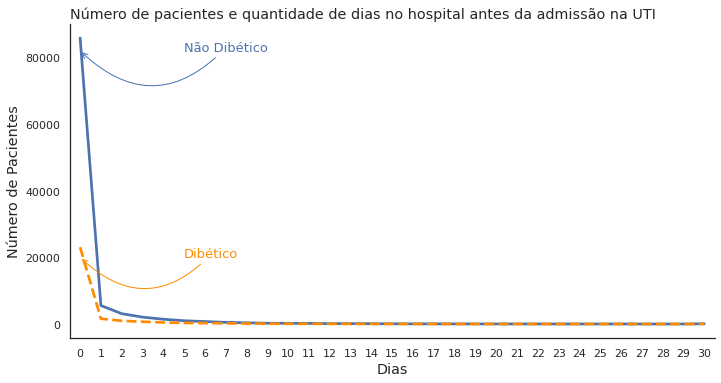

In [18]:
df_aux = df
days = []
for index, row in df_aux.iterrows():  
    if int(row['pre_icu_los_days']) < 30:
        days.append(int(row['pre_icu_los_days']))
    else:
        days.append(30)
        
df_aux['pre_days'] = days

ul.line_plot(df_aux, 'pre_days', 'diabetes_mellitus', xlabel='Número de Pacientes', ylabel='Dias',
             title='Número de pacientes e quantidade de dias no hospital antes da admissão na UTI')

## Complicações de saúde correlatas ao diabetes

Exploraremos agora as variáveis que tiveram maior correlação com diabetes_mellitus, conforme já mostramos num dos mapas de calor acima. Também investigaremos algumas variáveis que, mesmo não tendo apresentado alguma das maiores correlações, elas dizem respeito a algumas complicações correlatas à doença de acordo com a medicina. 

### Hiperglicemia

Aumento da taxa de glicose está diretamente relacionada ao diabetes, já que tal doença é caracterizada pelo aumento da taxa de glicose no sangue. Confira as escalas de classificação de acordo com a glicemia computada em jejum, de acordo com a Sociedade Brasileira de Diabtes. 

| Classificação | Nível de Glicemia ($mg/dL$) |
| --- | --- | 
| Abaixo | < 70 |
| Normal | 70 - 100 |
| Alerta para pré-diabetes | 100 - 126 |
| Alerta para diabetes | > 126 |

É importante ter em mente que um único exame não fecha o diagnóstico de diabetes ou pré-diabetes, mas acende um alerta. Há a necessidade de repetição do exame para confirmação.

Uma das variáveis relacionadas à taxa de glicose dos pacientes é glucose_apache, que é a concentração de glicose medida nas primeiras 24h que resultaram no maior score APACHE III. A distribuição de glucose_apache é mostrada na imagem abaixo. 

**Obs:** nas análises, consideramos que os exames foram feitos em jejum, assim, para a classificação das taxas de glicose, seguiremos o que pontuamos acima.

A classificação da taxa de glicose para boa parte dos pacientes está nas faixas: normal e pré-diabetes. Uma menor parte dos pacientes estavam com glicose abaixo do indicado e a outra parte, acima. Estes últimos estariam numa faixa de alerta para diabetes. Mais uma vez, atenção, não necessariamente tais pacientes são mesmo diabéticos (para ter tal diagnóstico teria que haver repetição do exame).

Observe que dos pacientes que estariam numa faixa de "alerta para diabetes”, a diferença da proporção dos que realmente são, em relação aos que não são, é menor. E mais, a partir do valor 250, mais ou menos, a quantidade de pacientes realmente diabéticos é maior (linha laranja por cima da azul) para alguns níveis de glicemia.
 

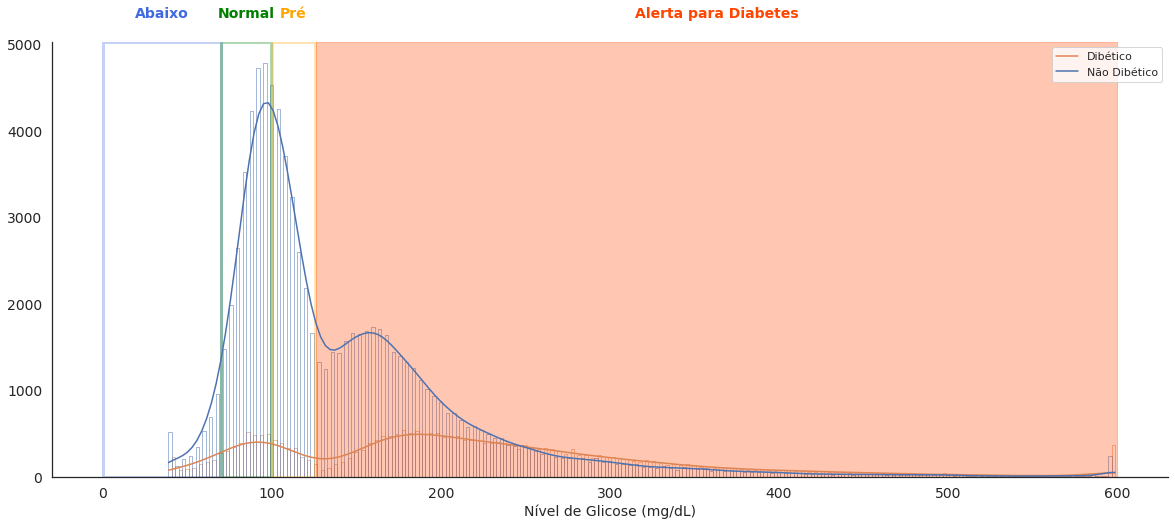

In [19]:
ul.hist_plot_annotated(df, 'glucose_apache', 'Nível de Glicose (mg/dL)', 
                  ranges = [[0,69.9], [70,99.9], [100,125.9], [126,600]],
                  classifications = ['Abaixo', 'Normal', 'Pré', 'Alerta para Diabetes'],
                  colors =  ['royalblue','green','orange', 'orangered'],
                  title='Distribuição de IMC dos pacientes',
                  fontsize=14, hue='diabetes_mellitus')

Agora, vamos verificar a porcentagem dos pacientes que não estão com hiperglicemia, quantos realmente estavam com diabetes. O gráfico abaixo mostra que apenas 14% deles estavam. 

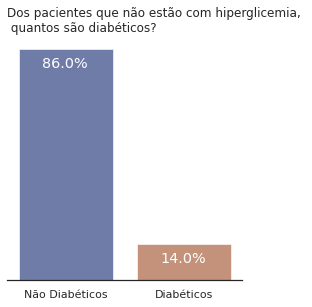

In [20]:
ul.bar_plot(df.loc[df['glucose_apache'] < 100], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, 
            fontsize='large', palette='dark',
            title='Dos pacientes que não estão com hiperglicemia, \n quantos são diabéticos?', alpha=0.6)

Já considerando somente os que estavam com "alerta para diabetes", 34% deles realmente eram diabéticos.

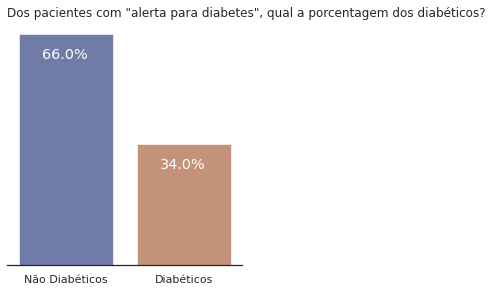

In [21]:
ul.bar_plot(df.loc[df['glucose_apache'] >= 126], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, 
            fontsize='large', palette='dark', 
            title='Dos pacientes com "alerta para diabetes", qual a porcentagem dos diabéticos?', alpha=0.6)

In [22]:
percent = df.loc[df['glucose_apache'] >=126]['diabetes_mellitus'].value_counts(normalize=True)

df_scores = pd.DataFrame(data={'Comorbidade' : ['Hiperglicemia'],
                               'Diabéticos': [percent[1]], 
                               'Não Diabéticos': [percent[0]]})

Outras variáveis relacionadas à glicose indicam o valor mínimo e máximo da glicose do paciente em uma hora. Assim, fizemos outra variável que representa a diferença entre estas duas. O histograma abaixo mostra a distribuição desta diferença. Observe que quando o valor vai se aproximando à 100, há uma diferença proporcional menor entre diabéticos e não diabéticos.

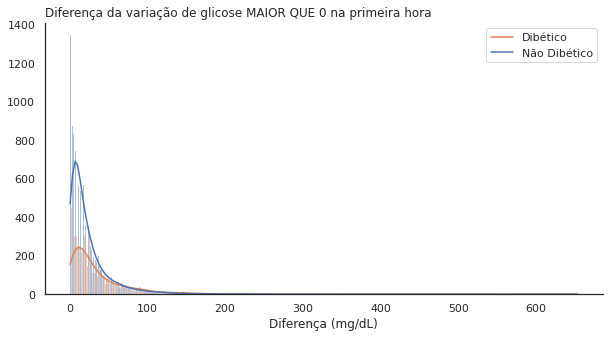

In [23]:
df_aux = df.loc[(df['h1_glucose_max'].notnull()) & (df['h1_glucose_min'].notnull())]
df_aux['h1_glucose_diff'] = df_aux['h1_glucose_max'] - df_aux['h1_glucose_min']

ul.hist_plot(df_aux.loc[df_aux['h1_glucose_diff'] > 0], 'h1_glucose_diff', 'Diferença (mg/dL)', hue='diabetes_mellitus',
             title='Diferença da variação de glicose MAIOR QUE 0 na primeira hora')

Também temos a informação sobre o maior e menor nivel de glicose nas primeiras 24h. Também fizemos outra variável que representa a diferença entre os dois valores, cuja distribuição é mostrada no histograma abaixo. E, novamente, quando vai se aproximando a 100 a diferença entre a proporção de diabéticos e não diabéticos vai diminuindo.

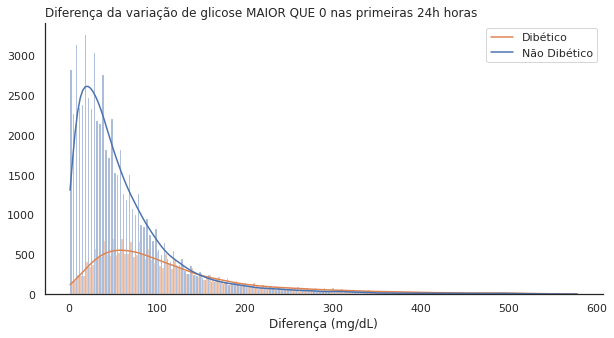

In [24]:
df_aux = df.loc[(df['d1_glucose_max'].notnull()) & (df['d1_glucose_min'].notnull())]
df_aux['d1_glucose_diff'] = df_aux['d1_glucose_max'] - df_aux['d1_glucose_min']

ul.hist_plot(df_aux.loc[df_aux['d1_glucose_diff'] > 0], 'd1_glucose_diff', 'Diferença (mg/dL)', hue='diabetes_mellitus',
             title='Diferença da variação de glicose MAIOR QUE 0 nas primeiras 24h horas')

### Obesidade

Uma das doenças associadas ao diabetes é a obesidade [<a href="https://www.diabetes.org.br/publico/temas-atuais-sbd/1728-dia-mundial-da-obesidade-a-relacao-entre-a-obesidade-e-o-diabetes">REF</a>]. Um dos fatores considerados no diagnóstico da obesidade é o Índice de Massa Corporal (IMC), que se trata de uma relação entre peso e altura, conforme a equação abaixo:

$$IMC = \frac{peso}{altura²}$$

A classificação segundo o IMC, é a seguinte:

| Classificação | IMC ($kg/m²$) |
| --- | --- | 
| Magreza | < 18,5 |
| Normal | 18,5 - 24,9 |
| Sobrepeso | 25 - 29,9 |
| Obesidade Tipo I | 30 - 34,9 |
| Obesidade Tipo II | 35 - 39,9 |
| Obesidade Tipo III | >= 40 |

Para nossas análises, consideramos estas classificações para relacionarmos obesidade com diabetes.

**Agora vamos para os dados!!!** 



O histograma abaixo mostra a distribuição do IMC dos pacientes. A maioria deles estão nas classificações: normal e sobrepeso.  Uma parte, embora pequena, dos pacientes com IMC normal também foram considerados diabéticos. Observe também que uma boa parte dos pacientes com algum tipo de obesidade também são diabéticos. À medida que o nível de obesidade aumenta, a diferença proporcional entre diabéticos e não diabéticos vai diminuindo. Tem que manter atenção também a pacientes com sobrepeso. 

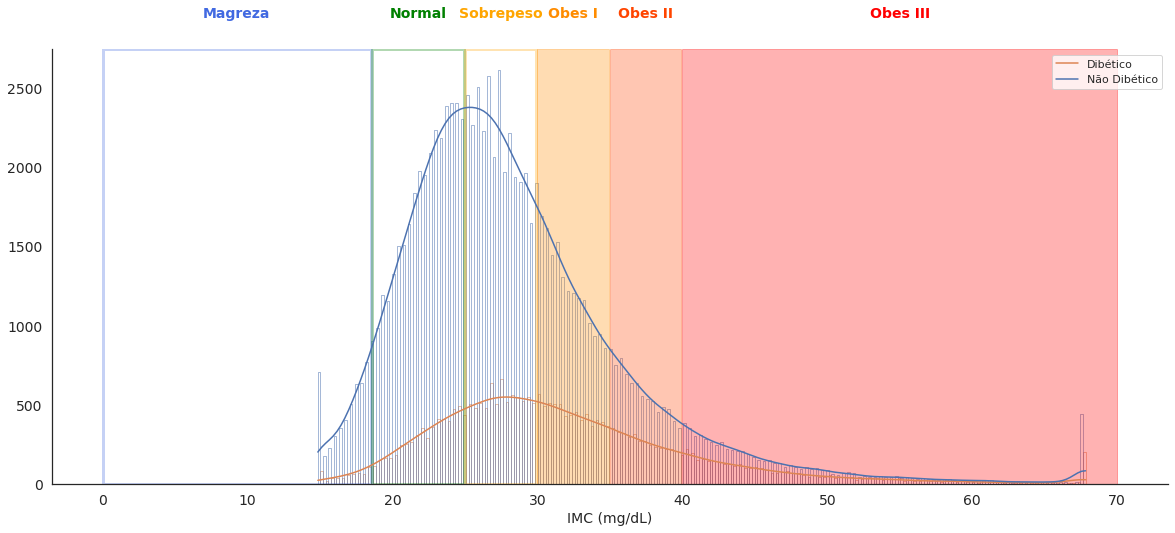

In [25]:
ul.hist_plot_annotated(df, 'bmi', 'IMC (mg/dL)', 
                  ranges = [[0,18.5], [18.6,24.9], [25,29.9], [30,34.9], [35,39.9], [40, 70]],
                  classifications = ['Magreza', 'Normal', 'Sobrepeso', 'Obes I', 'Obes II', 'Obes III'],
                  colors =  ['royalblue','green', 'orange', 'darkorange','orangered', 'red'],
                  title='Distribuição de IMC dos pacientes',
                  fontsize=14, hight=2500, hue='diabetes_mellitus')

Considerando apenas os pacientes com algum nível de obesidade, 30% deles são também diabéticos.

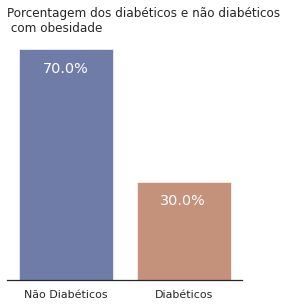

In [26]:
ul.bar_plot(df.loc[df['bmi'] >= 30], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, 
            fontsize='large', palette='dark',
            title='Porcentagem dos diabéticos e não diabéticos \n com obesidade', alpha=0.6)

In [27]:
percent = df.loc[df['bmi'] >= 30]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidade' : 'Obesidade',
                              'Diabéticos': percent[1], 
                              'Não Diabéticos': percent[0]},
                              ignore_index=True)

Já considerando apenas os pacientes com IMC abaixo ou dentro do esperado, apenas 14% deles são diabéticos.

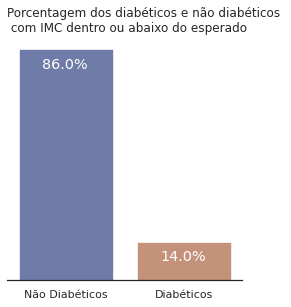

In [28]:
ul.bar_plot(df.loc[df['bmi'] < 25], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, 
            fontsize='large', palette='dark',
            title='Porcentagem dos diabéticos e não diabéticos \n com IMC dentro ou abaixo do esperado', alpha=0.6)

No gráfico abaixo, podemos observar a porcentagem de pacientes de cada classificação. Conforme já observado no histograma, a classificação da maioria deles é sobrepeso ou normal, seguidos dos três tipos de diabetes e por fim, a menor porcentagem deles são classificados como magros.

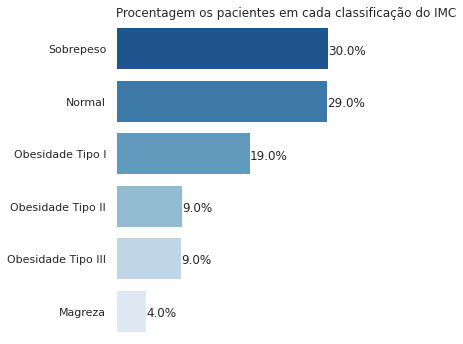

In [29]:
df_aux = ul.bmi_classification(df)
ul.horizontal_bar_plot(df_aux, 'imc_classification', "Procentagem os pacientes em cada classificação do IMC")

O gráfico abaixo mostra a porcentagem de diabéticos e não diabéticos em cada classificação de IMC. A porcentagem de diabéticos aumenta proporcionalmente ao IMC. "Magreza" e "Normal", que representam os menores valores de IMC são os que apresentam menores proporções de diabéticos em relação a não diabéticos. “Sobrepeso” tem um valor intermediário e à medida que o nível de obesidade vai aumentando, a porcentagem de diabéticos também aumenta.

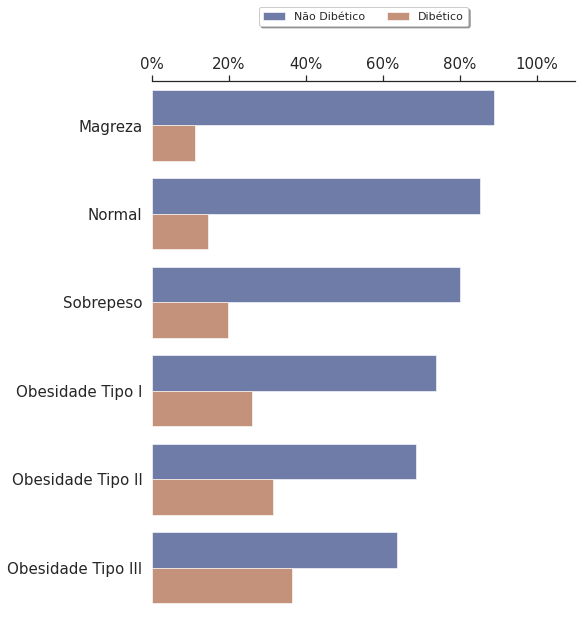

In [30]:
df_aux['diabetes_mellitus'] = df_aux['diabetes_mellitus'].replace(0, "Não Dibético")
df_aux['diabetes_mellitus'] = df_aux['diabetes_mellitus'].replace(1, "Dibético")

ul.grouped_bar_plot(df_aux, 'imc_classification', 'diabetes_mellitus', ['Não Dibético', 'Dibético'], height = 8)  

Abaixo, podemos observar a mesma informação que vimos no gráfico acima, mas em outra visualização (*você pode optar pela que achar melhor*).

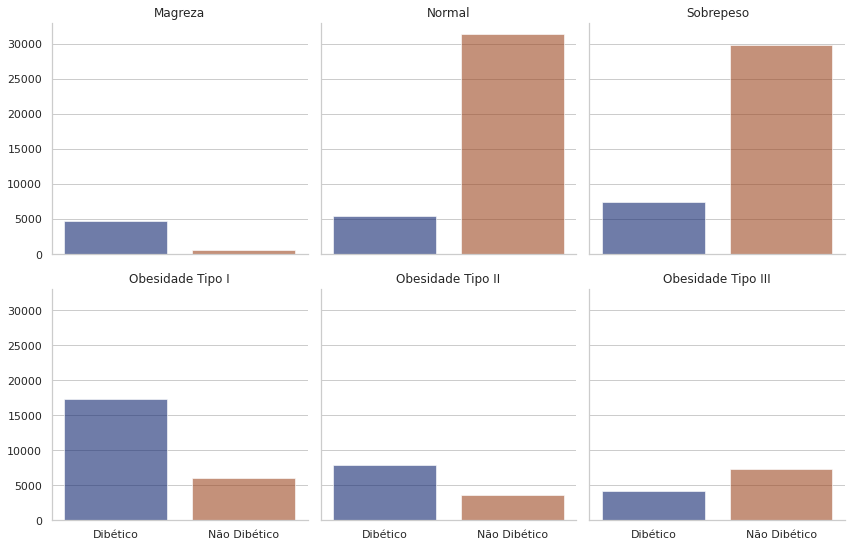

In [31]:
sns.set(style="whitegrid")

g = sns.FacetGrid(df_aux, col="imc_classification", height=4, col_wrap=3, 
                  col_order=['Magreza', 'Normal', 'Sobrepeso', 'Obesidade Tipo I', 'Obesidade Tipo II', 'Obesidade Tipo III'])
g.map(sns.countplot, 'diabetes_mellitus', palette='dark', alpha=0.6)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "")

sns.set(style="white")


### Doença Renal

Outro fator que pode estar associado ao diabetes é doença renal. A exposição a níveis altos de glicose por períodos longos de tempo pode causar lesões nos rins. A doença renal crônica associada aos diabetes (nefropatia diabética), por exemplo, é uma complicação que se instala de forma gradativa e assintomática. Algumas das consequências é a perda da função renal, com a necessidade de tratamento através de diálise ou transplante [<a href="https://www.diabetes.org.br/publico/artigos-sobre-diabetes/59-diabetes-e-doenca-renal-cronica">REF</a>].


**Agora vamos para os dados!!!** 


Uma das variáveis que podemos explorar neste contexto é arf_apache, ela indica se o paciente teve ou não alguma falha renal durante as primeiras 24h na UTI. Observe no gráfico abaixo que apenas 3% dos pacientes apresentaram falha em tal órgão no tempo em questão.

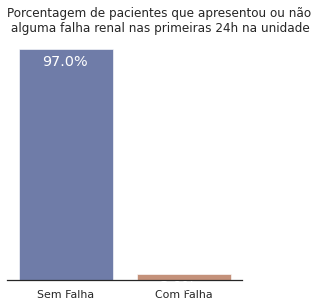

In [32]:
ul.bar_plot(df, 'arf_apache', ['Sem Falha', 'Com Falha'], order=[0, 1], height=4, fontsize='large', palette='dark',
            title='Porcentagem de pacientes que apresentou ou não \n alguma falha renal nas primeiras 24h na unidade', 
            alpha=0.6)

Agora vamos considerar somente os pacientes que apresentaram falha renal, aqueles 3%. Deste conjunto, 48% são diabéticos, conforme podemos ver no gráfico abaixo.

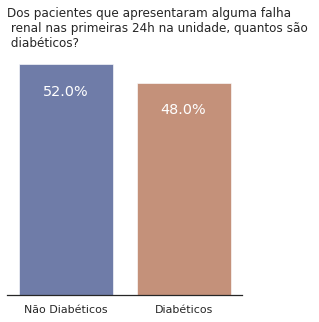

In [33]:
ul.bar_plot(df.loc[df['arf_apache'] == 1], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, 
            fontsize='large', palette='dark',
            title='Dos pacientes que apresentaram alguma falha \n renal nas primeiras 24h na unidade, quantos são \n diabéticos?', alpha=0.6)

In [34]:
percent = df.loc[df['arf_apache'] == 1]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidade' : 'Falha Renal',
                              'Diabéticos': percent[1], 
                              'Não Diabéticos': percent[0]},
                              ignore_index=True)

### Doença Hepática

As doenças hepáticas dizem respeito a um grupo de condições que comprometem o fígado. Elas também estão associadas ao diabetes, podendo tanto causar, como surgir como uma complicação de tal doença [<a href="http://www.revportdiabetes.com/wp-content/uploads/2017/11/RPD-Vol-10-n%C2%BA-4-Dezembro-2015-Artigo-de-Revis%C3%A3o-p%C3%A1gs-158-166.pdf">REF</a>].

**Vamos aos dados!!**


Então, decidimos verificar se algum paciente em nossa base sofreu alguma falha hepática. E se sofreu, será que ele também é diabético?

#### Cirrose

Cirrose é uma das doenças hepáticas que pode estar associada ao diabetes <a href="https://www.diabetes.org.br/publico/ultimas/1765-lobo-em-pele-de-cordeiro-de-cirrose-a-diabetes-tipo-2-entenda-um-pouco-mais-sobre-esteatose-hepatica">[REF]</a>.  

O gráfico abaixo mostra que 2% dos pacientes têm cirrose.

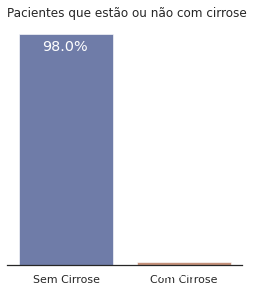

In [35]:
ul.bar_plot(df, 'cirrhosis', ['Sem Cirrose', 'Com Cirrose'], order=[0, 1], height=4, fontsize='large', palette='dark',
            title='Pacientes que estão ou não com cirrose', alpha=0.6)

Quando pegamos somente as pessoas que têm cirrose, observamos que 27% delas também são diabéticas (gráfico abaixo).

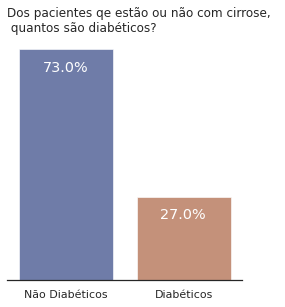

In [36]:
ul.bar_plot(df.loc[df['cirrhosis'] == 1], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, 
         fontsize='large', palette='dark', title='Dos pacientes qe estão ou não com cirrose,  \n quantos são diabéticos?', 
         alpha=0.6)

In [37]:
percent = df.loc[df['cirrhosis'] == 1]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidade' : 'Cirrose',
                              'Diabéticos': percent[1], 
                              'Não Diabéticos': percent[0]},
                              ignore_index=True)

#### Cirrose e outras falhas hepáticas

Agora, observando a quantidade de pacientes que além de cirrose têm outras complicações hepáticas, vemos que 1% dos pacientes apresentam estas condições, conforme vemos no gráfico abaixo.

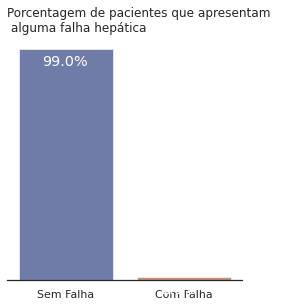

In [38]:
ul.bar_plot(df, 'hepatic_failure', ['Sem Falha', 'Com Falha'], order=[0, 1], height=4, fontsize='large', palette='dark',
            title='Porcentagem de pacientes que apresentam \n alguma falha hepática', alpha=0.6)

E dos que apresentaram cirrose e outras falhas hepáticas, qual a porcentagem dos diabéticos e não diabéticos? Podemos observar (no gráfico abaixo) que 25% dos pacientes sofreram destas complicações são diabéticos.

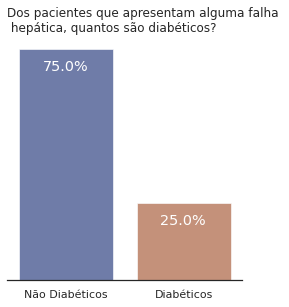

In [39]:
ul.bar_plot(df.loc[df['hepatic_failure'] == 1], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, 
            fontsize='large', palette='dark', 
            title='Dos pacientes que apresentam alguma falha \n hepática, quantos são diabéticos?', alpha=0.6)

In [40]:
percent = df.loc[df['hepatic_failure'] == 1]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidade' : 'Falhas Hepáticas',
                              'Diabéticos': percent[1], 
                              'Não Diabéticos': percent[0]},
                              ignore_index=True)

### Uréia

Aumento dos níveis de uréia é um sinal tardio de doença renal em pessoas com diabetes <a href="https://www.diabetes.org.br/publico/artigos-sobre-diabetes/59-diabetes-e-doenca-renal-cronica#:~:text=Quais%20s%C3%A3o%20os%20sinais%20tardios,a%20ocorr%C3%AAncia%20de%20acidose%20metab%C3%B3lica.">[REF 1]</a> <a href="https://www.diabetes.org.br/publico/para-voces/sbd-na-imprensa/937-diabetes-nao-controlado-pode-ocasionar-doenca-renal-cronica.">[REF 2]</a>. O valor referência de nitrogênio uréico no sangue varia entre 8 e 20 mg/dL <a href="https://www.boasaude.com.br/artigos-de-saude/4381/-1/ureia-no-sangue-nitrogenio-ureico.html#:~:text=n%C3%A3o%20%C3%A9%20necess%C3%A1ria.-,Resultados%3A,8%20e%2020%20mg%20%2Fdl.">[REF]</a>.

**Partiu para os dados!?!**

Tendo estas informações, analisaremos a taxa de nitrogênio uréico no sangue dos pacientes. O gráfico abaixo mostra esta distribuição. A maior parte dos pacientes têm níveis de nitrogênio uréico dentro da normalidade, de acordo com aquele intervalo, entre 8 e 20 mg/dL. Observamos que neste intervalo, a diferença proporcional entre diabéticos e não diabéticos é maior que quando a taxa de nitrogênio uréico é maior que 20 mg/dL (valores acima do adequado).

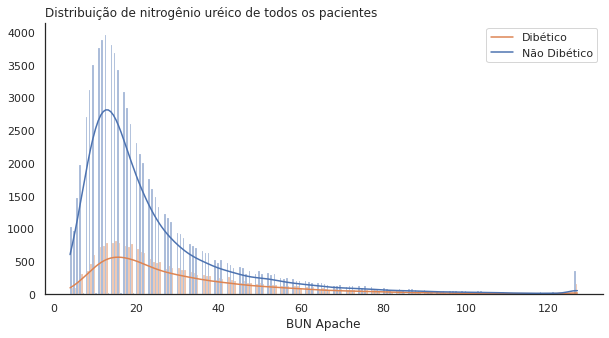

In [41]:
ul.hist_plot(df, 'bun_apache', 'BUN Apache', hue='diabetes_mellitus', title='Distribuição de nitrogênio uréico de todos os pacientes')

Para melhor visualização, o histograma abaixo, mostra somente os pacientes com nível de nitrogênio uréico acima do adequado (acima de 20 mg/dL). Assim, podemos observar mais claramente que uma proporção considerável de pacientes nestas circunstâncias são também diabéticos.

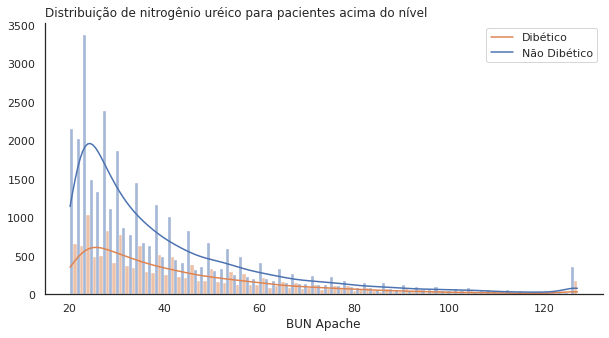

In [42]:
ul.hist_plot(df.loc[df['bun_apache'] > 20], 'bun_apache', 'BUN Apache', hue='diabetes_mellitus',
             title='Distribuição de nitrogênio uréico para pacientes acima do nível')

No gráfico abaixo, podemos observar melhor a proporção de pacientes diabéticos e não diabéticos com nível de nitrogênio uréico acima de 20 mg/dL, 29% deles são diabéticos.

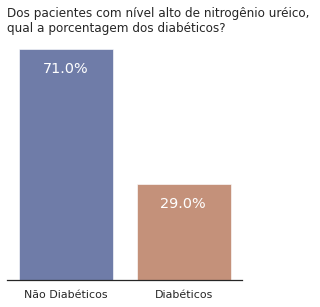

In [43]:
ul.bar_plot(df.loc[df['bun_apache'] > 20], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, 
            fontsize='large', palette='dark', 
            title='Dos pacientes com nível alto de nitrogênio uréico, \nqual a porcentagem dos diabéticos?', alpha=0.6)

In [44]:
percent = df.loc[df['bun_apache'] > 20]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidade' : 'Nível de Uréia Alto',
                              'Diabéticos': percent[1], 
                              'Não Diabéticos': percent[0]},
                              ignore_index=True)

Já se considerarmos os pacientes com nível de nitrogênio uréico adequado ou abaixo do valor de referência, observamos que a porcentagem de diabéticos é 17%.

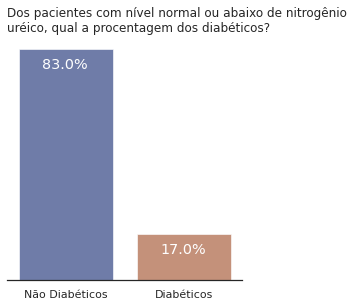

In [45]:
ul.bar_plot(df.loc[df['bun_apache'] <= 20], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1],
                 height=4, fontsize='large', palette='dark',
               title='Dos pacientes com nível normal ou abaixo de nitrogênio \nuréico, qual a procentagem dos diabéticos?', alpha=0.6)

Na base, também temos a informação sobre o maior e menor valor no nível de nitrogênio uréico dos pacientes das primeiras 24h. Assim, fizemos a diferença entre estes dois valores para observarmos o comportamento desta nova variável. O histograma da distribuição de tal variável é mostrado abaixo (plotamos os valores acima de 0). A maior parte dos pacientes tiveram diferença entre nível máximo e mínimo de nitrogênio uréico próximo a 0, no entanto a proporção de não diabéticos nestas faixas pequenas são bem maiores que as de diabéticos.

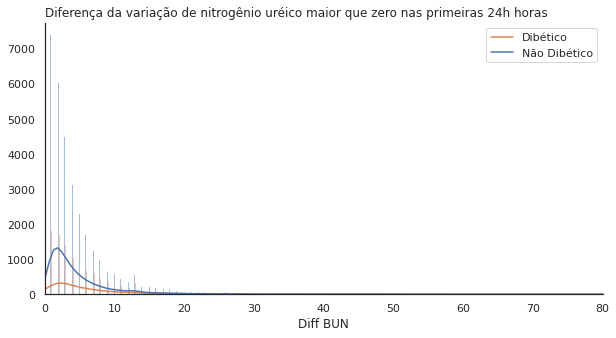

In [46]:
df_aux = df.loc[(df['d1_bun_max'].notnull()) & (df['d1_bun_min'].notnull())]
df_aux['d1_bun_diff'] = df_aux['d1_bun_max'] - df_aux['d1_bun_min']

ul.hist_plot(df_aux.loc[df_aux['d1_bun_diff'] > 0], 'd1_bun_diff', 'Diff BUN', hue='diabetes_mellitus',
             title='Diferença da variação de nitrogênio uréico maior que zero nas primeiras 24h horas', xlim=[0, 80])

No histograma abaixo, plotamos a distribuição das diferenças para valores maiores que 10. Observamos que a proporção de diabéticos é mais próxima à de não diabéticos do que em valores abaixo de 10 (como visto no histograma acima).

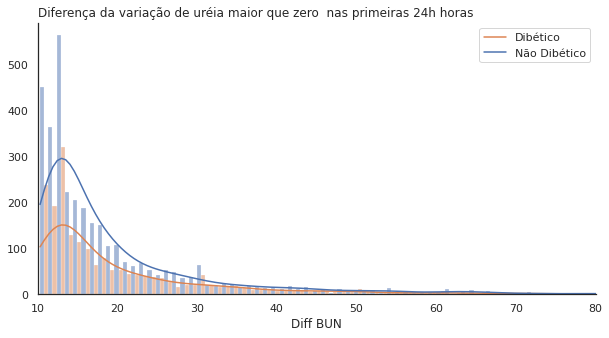

In [47]:
ul.hist_plot(df_aux.loc[df_aux['d1_bun_diff'] > 10], 'd1_bun_diff', 'Diff BUN', hue='diabetes_mellitus',
          title='Diferença da variação de uréia maior que zero  nas primeiras 24h horas',
         xlim=[10, 80])

Para entender melhor a diferença proporcional entre diabéticos e não diabéticos neste subgrupo (valor máximo menos valor mínimo de uréia maior que 10), plotamos o gráfico abaixo. Vemos que 36% dos pacientes nestas condições são diabéticas.

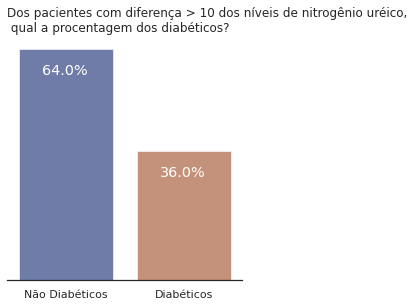

In [48]:
ul.bar_plot(df_aux.loc[df_aux['d1_bun_diff'] > 10], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4,
            fontsize='large', palette='dark', 
            title='Dos pacientes com diferença > 10 dos níveis de nitrogênio uréico, \n qual a procentagem dos diabéticos?', alpha=0.6)

### Creatina

Outro sinal tardio de doença renal em pessoas com diabetes é o aumento do nível de creatina  <a href="https://www.diabetes.org.br/publico/artigos-sobre-diabetes/59-diabetes-e-doenca-renal-cronica#:~:text=Quais%20s%C3%A3o%20os%20sinais%20tardios,a%20ocorr%C3%AAncia%20de%20acidose%20metab%C3%B3lica.">[REF 1]</a> <a href="https://www.diabetes.org.br/publico/para-voces/sbd-na-imprensa/937-diabetes-nao-controlado-pode-ocasionar-doenca-renal-cronica.">[REF 2]</a>. A faixa de normalidade da creatinina
sanguínea é de 0,6 a 1,3mg/dL <a href="https://arquivos.sbn.org.br/pdf/biomarcadores.pdf">[REF]</a>.


**Agora, os dados!**

Observando a distribuição de creatina dos pacientes, vemos que a maioria deles tem taxas entre 0 e 2. 

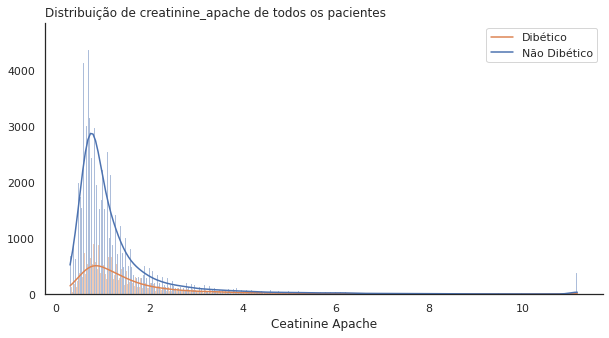

In [49]:
ul.hist_plot(df, 'creatinine_apache', 'Ceatinine Apache', hue='diabetes_mellitus',
          title='Distribuição de creatinine_apache de todos os pacientes')

Considerando apenas os valores de creatina maiores que o adequado (maiores que 1,3mg/dL). Vemos que à medida que o valor vai aumentando, a diferença entre a quantidade de não diabéticos e diabéticos tende a diminuir.

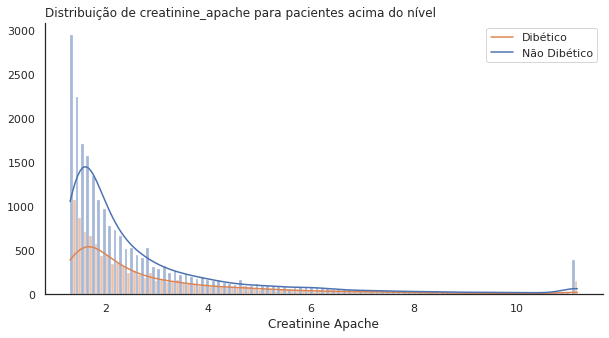

In [50]:
ul.hist_plot(df.loc[df['creatinine_apache'] > 1.3], 'creatinine_apache', 'Creatinine Apache', hue='diabetes_mellitus',
                 title='Distribuição de creatinine_apache para pacientes acima do nível')

No gráfico abaixo, vemos a proporção de pessoas diabéticas e não diabéticas, considerando os pacientes com nível de creatina acima do adequado.


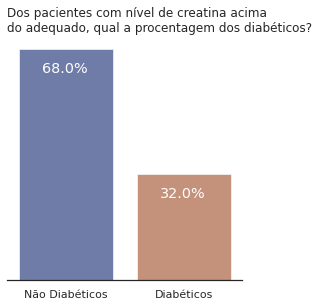

In [51]:
ul.bar_plot(df.loc[df['creatinine_apache'] > 1.3], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1],
            height=4, fontsize='large', palette='dark',
            title='Dos pacientes com nível de creatina acima \ndo adequado, qual a procentagem dos diabéticos?', alpha=0.6)

In [52]:
percent = df.loc[df['creatinine_apache'] > 1.3]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidade' : 'Nível alto de Creatina',
                              'Diabéticos': percent[1], 
                              'Não Diabéticos': percent[0]},
                              ignore_index=True)

Já o gráfico seguinte, mostra o contrário, a porcentagem de diabéticos e não diabéticos com nível de creatina dentro e abaixo do adequado.

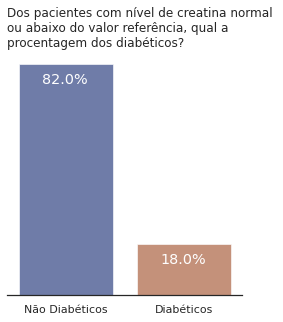

In [53]:
ul.bar_plot(df.loc[df['creatinine_apache'] <= 1.3], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1],
            height=4, fontsize='large', palette='dark',
            title='Dos pacientes com nível de creatina normal \nou abaixo do valor referência, qual a \nprocentagem dos diabéticos?', 
            alpha=0.6)

### Leucemia

Estudos revelam que quem possui diabetes tem mais risco de desenvolver câncer. Um dos tipos de câncer que pode ser desenvolvido é a leucemia <a href="https://boaforma.abril.com.br/saude/estudo-aponta-que-diabetes-aumenta-o-risco-de-cancer-sobretudo-em-mulheres/">[REF]</a>.

**Analisando os dados...**


Na base, 1% das pessoas foram diagnosticadas com leucemia, conforme vemos no gráfico abaixo.

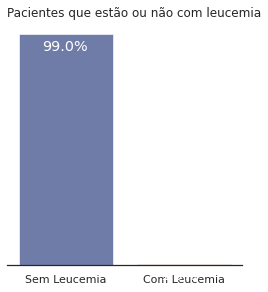

In [54]:
ul.bar_plot(df, 'leukemia', ['Sem Leucemia', 'Com Leucemia'], order=[0, 1], height=4, fontsize='large', palette='dark',
            title='Pacientes que estão ou não com leucemia', alpha=0.6)

Das pessoas que foram diagnosticadas com este tipo de câncer, 23% são também diabéticos.

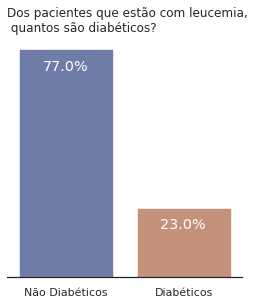

In [55]:
ul.bar_plot(df.loc[df['leukemia'] == 1], 'diabetes_mellitus', ['Não Diabéticos', 'Diabéticos'], order=[0, 1], height=4, 
            fontsize='large', palette='dark', title='Dos pacientes que estão com leucemia, \n quantos são diabéticos?', 
            alpha=0.6)

In [56]:
percent = df.loc[df['leukemia'] == 1]['diabetes_mellitus'].value_counts(normalize=True)
df_scores = df_scores.append({'Comorbidade' : 'Leucemia',
                              'Diabéticos': percent[1], 
                              'Não Diabéticos': percent[0]},
                              ignore_index=True)

# Lições do Storytelling com Dados

Conforme falamos no início, aplicamos algumas aprendidas no livro "**<a href="https://www.storytellingwithdata.com/books">Storytelling com dados</a>**" da Cole Knaflic. Listaremos algumas delas:

## Gráficos

- Removemos as bordas dos gráficos, uma vez que elas são desnecessárias. 

- Usamos mapas de calor para expressar informações em formatos tabular, dando pistas visuais. Assim, em vez (ou além dos números), transmitimos a magnitude relativa dos números. Usamos a saturação de uma cor para expressar a magnitude dos números (tonalidades mais claras indicam valores menores e as mais escuras, valores maiores). 

- Segundo Cole, gráficos em barra são evitados muitas vezes por serem comuns, mas isso é um erro. Ela fala que eles devem ser usados porque são de fácil interpretação. Rapidamente o público pode ver qual a pode ver qual a categoria maior, qual a menor e até mesmo a diferença incremental entre as categorias. Nestas análises, fizemos uso de muitos gráficos deste tipo.

- Outro alerta dado pela autora que foi adotada aqui é que é importante que os gráficos em barra tenham uma linha base 0. Nos de barras verticais, por exemplo, o eixo x cruza o y na base 0. Caso contrário, obtém-se uma falsa comparação visual.

- Em alguns gráficos de barra que usamos para representar porcentagem (nos verticais), colocamos os números dentro das barras. Segundo Cole, isso reduz a saturação.

- Ainda em alguns gráficos de barra verticais, naqueles que colocamos os números dentro das barras, omitimos o eixo y inteiramente para mostrar a legenda apenas dentro das barras. Isso reduz a redundância da informação.

- Variáveis categóricas também podem ser usadas em gráficos de barras horizontais. Eles são muito úteis quando os nomes das categorias são grandes. Além disso, como se lê da esquerda para a direita, lê-se primeiro os nomes das categorias e depois os dados (as barras). Assim, antes da pessoa chegar nos dados, ela já sabe do que se trata.

- Utilizamos ordem visual dos dados (nos gráficos de barras horizontais), começando da categoria de maior quantidade para a menor, facilitando assim a leitura dos dados. Além de facilitar a visualização dos tamanhos da barra, é possível ver o quanto um segmento é maior que o outro.

- Eliminamos o eixo x dos gráficos de barras horizontais em que as barras são legendadas com as respectivas porcentagens, reduzindo, assim, a redundância da informação. Nos que não são legendados, movemos o eixo x para cima, facilitando, assim, a leitura.

- Usamos um gráfico de linhas para expressar dados contínuos em ordem temporal, de dias.

- No gráfico de linhas, legendamos os dados diretamente, colocando a legenda próxima aos dados que elas descrevem. Isso diminui a carga cognitiva de ir e voltar nas legendas.

- Nos gráficos de barra em geral, Cole recomenda que a largura dos espaços em branco seja menor que a largura das barras. Aplicamos isso em nossos gráficos.

- Na maioria dos gráficos, eliminamos as linhas de grade para maior contraste e destaque aos dados. Só deixamos as linhas de grade em uma das visualizações da classificação do IMC porque achamos que iria facilitar a leitura, uma vez que só usamos um eixo y para três gráficos alinhados e não usamos a legenda diretamente nas barras. No entanto, as linhas são finas e a cor é clara, não concorrendo visualmente com os dados.

## Cores 

- É muito comum, em nossos gráficos, usarmos verde para indicar algo positivo e vermelho para indicar algo negativo. No entanto, quando usamos estas duas cores neste cenário, não é acessível para pessoas daltônicas. Assim, a Cole recomenda que usemos outras cores, como azul e laranja, por exemplo. Azul indicando algo positivo e laranja indicando algo negativo. Aqui, em alguns dos gráficos (*onde cabia*), usamos laranja e azul para indicar porcentagem de diabéticos e não diabéticos, respectivamente.

- Outro ponto em relação ao uso de cores diz respeito ao uso moderado das cores. É comum ver, por exemplo, tabelas com uma grande variedade de cores. Cole menciona que "variedade demais impede que algo se destaque". Aqui, em nossos mapas de calor usamos uma saturação variada de uma cor, o azul, no caso. As tonalidades mais claras indicam valores menores e as mais escuras, valores maiores. 

- Em alguns gráficos usamos a cor de forma a realçar partes importantes, que gostaríamos de chamar atenção. Um exemplo é o de distribuição de IMC.

# Considerações finais

Fizemos a análise exploratória dos dados, observando algumas variáveis mais gerais (idade, gênero) e outras mais específicas que estão de alguma forma relacionada ao diabetes, seja por uma razão de consequência, de causa ou até mesmo dos dois (diabetes e a doença hepática, por exemplo, têm uma relação bi-direcional [<a href="http://www.revportdiabetes.com/wp-content/uploads/2017/11/RPD-Vol-10-n%C2%BA-4-Dezembro-2015-Artigo-de-Revis%C3%A3o-p%C3%A1gs-158-166.pdf">REF</a>]).


Na tabela abaixo, temos resumidamente a relação entre diabetes e algumas doenças. Ela mostra a porcentagem de diabéticos e não diabéticos para pacientes portadores de cada doença. Pacientes com falha renal, são os que apresentam maior proporção de diabéticos em relação aos não diabéticos.

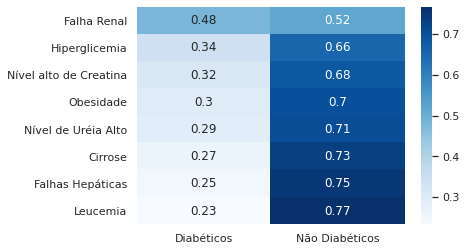

In [57]:
df_scores = df_scores.sort_values(by='Diabéticos', ascending=False)
labels = df_scores['Comorbidade']
df_scores = pd.DataFrame(df_scores, columns= ['Diabéticos','Não Diabéticos'])
g = sns.heatmap(df_scores, annot=True, cmap='Blues', yticklabels=labels.to_numpy())

Depois da análise exploratória, listamos algumas das lições do livro Storytelling com Dados da Cole Knaflic que aplicamos em nosso contexto.

É isso!! Espero que você tenha aproveitado. Até a próxima!!

In [58]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostrar/Esconder Código."></form>''')

In [59]:
HTML('''<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Criado por Chaina Oliveira
</footer>''')